# Task 6.5 - Unsupervised Machine Learning: Clustering

## Wine Reviews Dataset

In [1]:
# Import libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [3]:
# Ensure the graphs created are displayed in notebook

%matplotlib inline

In [4]:
# Define path

path = r'/Users/cassystunkel/Documents/Wine Analysis'

In [5]:
# Import dataset

df = pd.read_csv(os.path.join(path, 'Data Sets', 'Prepared Data', 'wine_data_no_outliers.csv'))

In [6]:
# Check columns

df.columns

Index(['Unnamed: 0', 'country', 'points', 'price', 'province', 'variety',
       'price_missing', 'Price category'],
      dtype='object')

In [7]:
# Remove categorical comlumns

df_nums = df.drop(columns = ['Unnamed: 0', 'country', 'province', 'variety', 'price_missing', 'Price category'])

In [8]:
# check headers

df_nums.head()

,points,price
0,96,65.0
1,95,66.0
2,95,73.0
3,95,65.0
4,95,65.0


### Use the elbow technique

In [9]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [10]:
# create a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(df_nums).score(df_nums) for i in range(len(kmeans))]

/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

In [11]:
score

[-33111892.63220431,
 -10062245.044632304,
 -5321940.644169265,
 -3394463.3944558892,
 -2486226.3746677795,
 -1939492.9842219313,
 -1654274.6507097625,
 -1449926.7865763209,
 -1306139.3038908816]

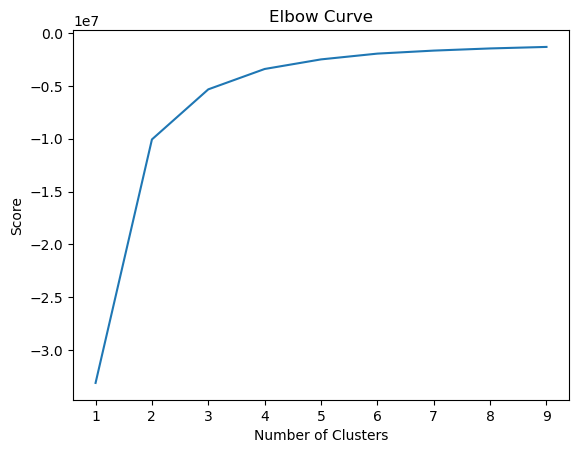

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Make an informed decision about the number of clusters you'll use in your k-means algorithm based on the chart.

I will be using three clusters in my k-means algorithm. Looking at the chart, we can observe that it jumps from two to three on the x-axis, and ten rises only slightly after three, making the optimal count for my clusters three.

### Run the k-means algorithm

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df_nums)

/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [15]:
df_nums['clusters'] = kmeans.fit_predict(df_nums)

/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
# Check headers

df_nums.head()

,points,price,clusters
0,96,65.0,1
1,95,66.0,1
2,95,73.0,1
3,95,65.0,1
4,95,65.0,1


In [18]:
# Check value counts of 'clusters' column

df_nums['clusters'].value_counts()

clusters
0    65887
2    42047
1    21714
Name: count, dtype: int64

### Create visualizations

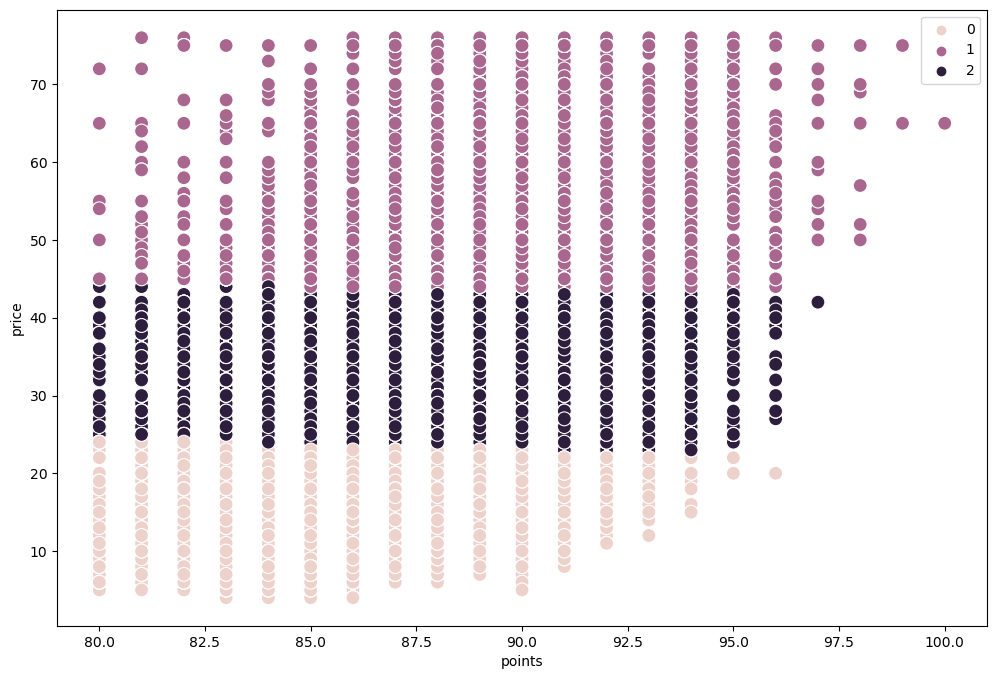

In [19]:
# Plot the clusters for the 'price' and 'points' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_nums['points'], y=df_nums['price'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('points')
plt.ylabel('price')
plt.show()

These clusters are somewhat reflective of the 'price category' variable I had created previously: the light pink being representative of the lower priced wines, dark purple representing mid-range priced wine, and pink being wine on the more expensive end. Each cluster contains wines of varying rating (or 'points'). Wine on the pricier side does show to have fewer low-ratings and also the only ratings above 97.5.

### Calculate the descriptive statistics

In [20]:
df_nums.loc[df_nums['clusters'] == 2, 'cluster'] = 'dark purple'
df_nums.loc[df_nums['clusters'] == 1, 'cluster'] = 'purple'
df_nums.loc[df_nums['clusters'] == 0, 'cluster'] = 'pink'

In [21]:
df_nums.groupby('cluster').agg({'points':['mean', 'median'], 
                         'price':['mean', 'median']})

points             price       
                  mean median       mean median
cluster                                        
dark purple  88.316979   88.0  31.501439   30.0
pink         86.142365   86.0  15.456509   15.0
purple       90.210003   90.0  55.687575   54.0

These results could be useful for further categorizing the wine dataset. Knowing that the 'purple' cluster contains the highest rated wines could assist in digging deeper into what exactly produces a high-rated wine. We know that price has a bit of a factor, but why are these wines higher-priced? Is location a factor in pricing? What varieties are we seeing most within this cluster?